In [1]:
#!pip install opencv-python --user

In [2]:
from tensorflow.keras.models import load_model
import os
import numpy as np

import cv2
import matplotlib.pyplot as plt

from PIL import Image
import os

In [3]:
cv2.__version__

'4.7.0'

In [4]:
os.chdir(r'../Datasets/')

In [5]:
'''
LOAD MODEL the model
'''
#model = load_model('../19 Face Mask Detection/recognize_mask.h5')
model = load_model(filepath = 'recognize_mask.h5', compile=False)


In [6]:
#Layers of the trained model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [7]:
model.input_shape

(None, 224, 224, 3)

In [28]:
webcam = cv2.VideoCapture(0) #Use camera 0


while True:
    (rval, im) = webcam.read()
    
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is pressed then break out of the loop 
    if key == 27: #The Esc key
        break

    frame = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)       
        
        # Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

In [ ]:
#Here even though the face is covered there is no face mask

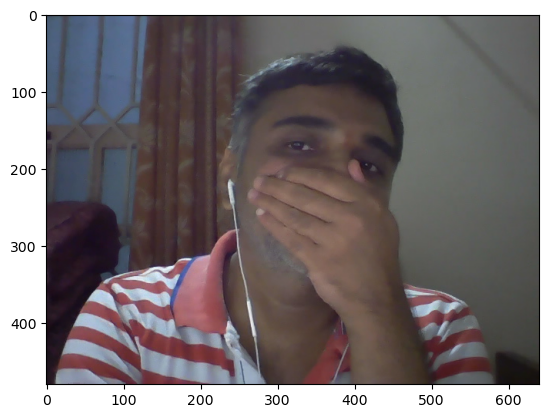

In [29]:
image1 = Image.fromarray(frame)
plt.imshow(image1)
plt.show()

In [30]:
resize_frame = cv2.resize(frame, (224,224))

In [31]:
img = resize_frame.astype('float32')
img /= 255
img = img.reshape((1,224,224,3))

In [32]:
img.shape

(1, 224, 224, 3)

In [33]:
'''
PREDICTING
'''
 
ret = model.predict(img, batch_size=1) 

1/1 [==============================] - 0s 67ms/step


In [34]:
ret

array([[0.96290904]], dtype=float32)

In [38]:
result=np.around(ret)

In [39]:
result

array([[1.]], dtype=float32)

In [40]:
if result == 1:
    prediction = 'No Mask'
else:
    prediction = 'Mask'
    
prediction

'No Mask'

### Putting it all Together as a UDF
    1. capture_video()  -Captures the video and returns the captured image frame as an array
    2. check mask() - uses the frame array returned in previous step, pre-processes it and makes the prediction 

In [41]:
def capture_video():
    webcam = cv2.VideoCapture(0) #Use camera 0


    while True:
        (rval, im) = webcam.read()
    
        cv2.imshow('LIVE', im)
        key = cv2.waitKey(10)
        # if Esc key is pressed then break out of the loop 
        if key == 27: #The Esc key
            break
        frame = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)       
        
    # Stop video
    webcam.release()

    # Close all started windows
    cv2.destroyAllWindows()
    return frame

In [42]:
def check_mask():
    frame = capture_video()
    resize_frame = cv2.resize(frame, (224,224))
    img = resize_frame.astype('float32')
    img /= 255
    img = img.reshape((1,224,224,3))
    model = load_model('recognize_mask.h5')
    proba = model.predict(img, batch_size=1, verbose=0)
    result=np.around(proba)
    if result == 1:
        prediction = 'No Mask'
    else:
        prediction = 'Mask'
    return (prediction,frame,proba)

In [ ]:
#PRediction with face mask

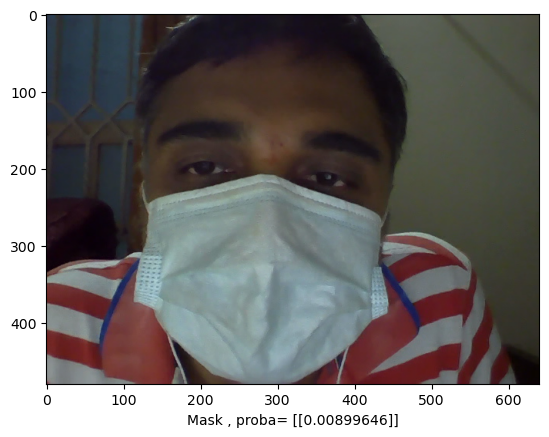

In [44]:
(prediction,frame,proba) = check_mask()
image1 = Image.fromarray(frame)
plt.imshow(image1);
xlabel_string = prediction + " , proba= "+ str(proba)
plt.xlabel(xlabel_string);